In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame({'AAA': [4,5,6,7], 'BBB': [10, 20, 30, 40], 'CCC': [100, 50, -30, -50]})
aValue = 43.0

0    57.0
1     7.0
2   -73.0
3   -93.0
Name: CCC, dtype: float64

In [3]:
df.CCC - aValue

0    57.0
1     7.0
2   -73.0
3   -93.0
Name: CCC, dtype: float64

In [5]:
(df.CCC - aValue).abs()

0    57.0
1     7.0
2    73.0
3    93.0
Name: CCC, dtype: float64

In [6]:
(df.CCC - aValue).abs().argsort()

0    1
1    0
2    2
3    3
Name: CCC, dtype: int64

In [8]:
df.loc[(df.CCC - aValue).abs().argsort()]

,AAA,BBB,CCC
1,5,20,50
0,4,10,100
2,6,30,-30
3,7,40,-50


In [7]:
df.loc[[1,0,2,3]]

,AAA,BBB,CCC
1,5,20,50
0,4,10,100
2,6,30,-30
3,7,40,-50


In [9]:
Crit1 = df.AAA <= 5.5
Crit1

0     True
1     True
2    False
3    False
Name: AAA, dtype: bool

In [10]:
Crit2 = df.BBB == 10.0
Crit2

0     True
1    False
2    False
3    False
Name: BBB, dtype: bool

In [11]:
Crit3 = df.CCC > -40.0
Crit3

0     True
1     True
2     True
3    False
Name: CCC, dtype: bool

In [12]:
AllCrit = Crit1 & Crit2 & Crit3
AllCrit

0     True
1    False
2    False
3    False
dtype: bool

In [13]:
import functools
CritList = [Crit1, Crit2, Crit3]
AllCrit = functools.reduce(lambda x, y: x&y, CritList)
AllCrit

0     True
1    False
2    False
3    False
dtype: bool

In [14]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [15]:
df.index = 'foo bar boo kar'.split()

In [16]:
df

,AAA,BBB,CCC
foo,4,10,100
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [17]:
df = pd.DataFrame({'AAA': [1,2,1,3], 'BBB': [1,1,2,2], 'CCC': [2,1,3,1]})
source_cols = df.columns
source_cols

Index(['AAA', 'BBB', 'CCC'], dtype='object')

In [20]:
new_cols = [str(x) + '_cat' for x in source_cols]
new_cols

['AAA_cat', 'BBB_cat', 'CCC_cat']

In [25]:
categories = {1: 'Alpha', 2: 'Beta', 3: 'Charlie'}
categories

{1: 'Alpha', 2: 'Beta', 3: 'Charlie'}

In [29]:
df[new_cols] = df[source_cols].applymap(categories.get)

In [30]:
df

,AAA,BBB,CCC,AAA_cat,BBB_cat,CCC_cat
0,1,1,2,Alpha,Alpha,Beta
1,2,1,1,Beta,Alpha,Alpha
2,1,2,3,Alpha,Beta,Charlie
3,3,2,1,Charlie,Beta,Alpha


In [31]:
df = pd.DataFrame({'AAA': [1,1,1,2,2,2,3,3], 'BBB': [2,1,3,4,5,1,2,3]})
df.loc[df.groupby('AAA')['BBB'].idxmin()]

,AAA,BBB
1,1,1
5,2,1
6,3,2


In [32]:
df.sort_values('BBB').groupby('AAA', as_index=False).first()

,AAA,BBB
0,1,1
1,2,1
2,3,2


In [46]:
df = pd.DataFrame({'One_X': [1.1, 1.1, 1.1], 'One_Y': [1.2, 1.2, 1.2],
                   'Two_X': [1.11, 1.11, 1.11], 'Two_Y': [1.22, 1.22, 1.22]})
df

,One_X,One_Y,Two_X,Two_Y
0,1.1,1.2,1.11,1.22
1,1.1,1.2,1.11,1.22
2,1.1,1.2,1.11,1.22


In [47]:
df.index.name = 'row'

In [48]:
df.columns

Index(['One_X', 'One_Y', 'Two_X', 'Two_Y'], dtype='object')

In [50]:
df.columns = pd.MultiIndex.from_tuples([tuple(c.split('_')) for c in df.columns])
df

One        Two      
       X    Y     X     Y
row                      
0    1.1  1.2  1.11  1.22
1    1.1  1.2  1.11  1.22
2    1.1  1.2  1.11  1.22

In [51]:
df.stack(0)

X     Y
row                
0   One  1.10  1.20
    Two  1.11  1.22
1   One  1.10  1.20
    Two  1.11  1.22
2   One  1.10  1.20
    Two  1.11  1.22

In [52]:
df.stack(0).reset_index(1)

,level_1,X,Y
row,,,
0,One,1.10,1.20
0,Two,1.11,1.22
1,One,1.10,1.20
1,Two,1.11,1.22
2,One,1.10,1.20
2,Two,1.11,1.22


In [53]:
df = df.stack(0).reset_index(1)

In [54]:
df.columns = ['Sample', 'All_X', 'All_Y']
df

,Sample,All_X,All_Y
row,,,
0,One,1.10,1.20
0,Two,1.11,1.22
1,One,1.10,1.20
1,Two,1.11,1.22
2,One,1.10,1.20
2,Two,1.11,1.22


In [55]:
cols = pd.MultiIndex.from_tuples([(x, y) for x in ['A', 'B', 'C'] for y in ['O', 'I']])
df = pd.DataFrame(np.random.randn(2, 6), index=['n', 'm'], columns=cols)
df

A                   B                   C          
          O         I         O         I         O         I
n  0.288057  1.940542 -0.703749 -0.989190  0.511858 -0.000982
m -0.987409  1.597264 -0.169004  0.028761  1.864301 -1.168004

In [57]:
df.div(df['C'], level=1)

A                      B                 C     
          O            I         O            I    O    I
n  0.562768 -1975.850352 -1.374892  1007.188297  1.0  1.0
m -0.529640    -1.367515 -0.090653    -0.024624  1.0  1.0

In [58]:
df = round(df.div(df['C'], level=1), 2)
df

A              B             C     
      O        I     O        I    O    I
n  0.56 -1975.85 -1.37  1007.19  1.0  1.0
m -0.53    -1.37 -0.09    -0.02  1.0  1.0

In [59]:
import itertools

In [60]:
index = list(itertools.product(['Ada', 'Quinn', 'Violet'], ['Comp', 'Math', 'Sci']))
index

[('Ada', 'Comp'),
 ('Ada', 'Math'),
 ('Ada', 'Sci'),
 ('Quinn', 'Comp'),
 ('Quinn', 'Math'),
 ('Quinn', 'Sci'),
 ('Violet', 'Comp'),
 ('Violet', 'Math'),
 ('Violet', 'Sci')]

In [61]:
headr = list(itertools.product(['Exams', 'Labs'], ['I', 'IT']))
headr

[('Exams', 'I'), ('Exams', 'IT'), ('Labs', 'I'), ('Labs', 'IT')]

In [62]:
indx = pd.MultiIndex.from_tuples(index, names=['Student', 'Course'])
indx

MultiIndex([(   'Ada', 'Comp'),
            (   'Ada', 'Math'),
            (   'Ada',  'Sci'),
            ( 'Quinn', 'Comp'),
            ( 'Quinn', 'Math'),
            ( 'Quinn',  'Sci'),
            ('Violet', 'Comp'),
            ('Violet', 'Math'),
            ('Violet',  'Sci')],
           names=['Student', 'Course'])

In [64]:
cols = pd.MultiIndex.from_tuples(headr)
cols

MultiIndex([('Exams',  'I'),
            ('Exams', 'IT'),
            ( 'Labs',  'I'),
            ( 'Labs', 'IT')],
           )

In [73]:
data = [[70 + x + y + (x*y) % 3 for x in range(4)] for y in range(9)]
# len(data[0])
data

[[70, 71, 72, 73],
 [71, 73, 75, 74],
 [72, 75, 75, 75],
 [73, 74, 75, 76],
 [74, 76, 78, 77],
 [75, 78, 78, 78],
 [76, 77, 78, 79],
 [77, 79, 81, 80],
 [78, 81, 81, 81]]

In [75]:
df = pd.DataFrame(data, indx, cols)
df

Exams     Labs    
                   I  IT    I  IT
Student Course                   
Ada     Comp      70  71   72  73
        Math      71  73   75  74
        Sci       72  75   75  75
Quinn   Comp      73  74   75  76
        Math      74  76   78  77
        Sci       75  78   78  78
Violet  Comp      76  77   78  79
        Math      77  79   81  80
        Sci       78  81   81  81

In [77]:
All = slice(None)

In [ ]:
df.loc['Violet']
df.loc[(All, 'Math'), All]

In [79]:
df1 = pd.DataFrame({('USAF', ''): {0: '702730',
  1: '702730',
  2: '702730',
  3: '702730',
  4: '702730'},
 ('WBAN', ''): {0: '26451', 1: '26451', 2: '26451', 3: '26451', 4: '26451'},
 ('day', ''): {0: 1, 1: 2, 2: 3, 3: 4, 4: 5},
 ('month', ''): {0: 1, 1: 1, 2: 1, 3: 1, 4: 1},
 ('s_CD', 'sum'): {0: 12.0, 1: 13.0, 2: 2.0, 3: 12.0, 4: 10.0},
 ('s_CL', 'sum'): {0: 0.0, 1: 0.0, 2: 10.0, 3: 0.0, 4: 0.0},
 ('s_CNT', 'sum'): {0: 13.0, 1: 13.0, 2: 13.0, 3: 13.0, 4: 13.0},
 ('s_PC', 'sum'): {0: 1.0, 1: 0.0, 2: 1.0, 3: 1.0, 4: 3.0},
 ('tempf', 'amax'): {0: 30.920000000000002,
  1: 32.0,
  2: 23.0,
  3: 10.039999999999999,
  4: 19.939999999999998},
 ('tempf', 'amin'): {0: 24.98,
  1: 24.98,
  2: 6.9799999999999969,
  3: 3.9199999999999982,
  4: 10.940000000000001},
 ('year', ''): {0: 1993, 1: 1993, 2: 1993, 3: 1993, 4: 1993}})
df1

USAF   WBAN day month  s_CD  s_CL s_CNT s_PC  tempf         year
                             sum   sum   sum  sum   amax   amin      
0  702730  26451   1     1  12.0   0.0  13.0  1.0  30.92  24.98  1993
1  702730  26451   2     1  13.0   0.0  13.0  0.0  32.00  24.98  1993
2  702730  26451   3     1   2.0  10.0  13.0  1.0  23.00   6.98  1993
3  702730  26451   4     1  12.0   0.0  13.0  1.0  10.04   3.92  1993
4  702730  26451   5     1  10.0   0.0  13.0  3.0  19.94  10.94  1993

In [86]:
df1.columns = df1.columns.get_level_values(0)

In [87]:
df1

,USAF,WBAN,day,month,s_CD,s_CL,s_CNT,s_PC,tempf,tempf,year
0,702730,26451,1,1,12.0,0.0,13.0,1.0,30.92,24.98,1993
1,702730,26451,2,1,13.0,0.0,13.0,0.0,32.00,24.98,1993
2,702730,26451,3,1,2.0,10.0,13.0,1.0,23.00,6.98,1993
3,702730,26451,4,1,12.0,0.0,13.0,1.0,10.04,3.92,1993
4,702730,26451,5,1,10.0,0.0,13.0,3.0,19.94,10.94,1993


In [97]:
df2 = pd.DataFrame({'A' : ['a1', 'a1', 'a2', 'a3'], 
                   'B' : ['b1', 'b2', 'b3', 'b4'], 
                   'Vals' : np.random.randn(4)}
                 ).groupby(['A', 'B']).sum()
df2

Vals
A  B           
a1 b1 -0.187940
   b2  0.714366
a2 b3 -0.361877
a3 b4  0.473496

In [100]:
pd.concat({'Foo': df2})

Vals
    A  B           
Foo a1 b1 -0.187940
       b2  0.714366
    a2 b3 -0.361877
    a3 b4  0.473496

In [108]:
df = pd.DataFrame(data, indx, cols)
# df.columns = [' '.join(col).strip() for col in df.columns.values]
# df.columns.values
df.columns = [' '.join(col).strip() for col in df.columns]
df

Exams I  Exams IT  Labs I  Labs IT
Student Course                                    
Ada     Comp         70        71      72       73
        Math         71        73      75       74
        Sci          72        75      75       75
Quinn   Comp         73        74      75       76
        Math         74        76      78       77
        Sci          75        78      78       78
Violet  Comp         76        77      78       79
        Math         77        79      81       80
        Sci          78        81      81       81

In [111]:
df = pd.DataFrame({'animal': 'cat dog cat fish dog cat cat'.split(),
                    'size': list('SSMMMLL'),
                    'weight': [8, 10, 11, 1, 20, 12, 12],
                    'adult': [False] * 5 + [True] * 2})
# df.groupby('animal').apply(lambda subf: subf['size'][subf['weight'].idxmax()])
gb = df.groupby(['animal'])
gb.get_group('cat')

,animal,size,weight,adult
0,cat,S,8,False
2,cat,M,11,False
5,cat,L,12,True
6,cat,L,12,True


In [113]:
def GrowUp(x):
    avg_weight = sum(x[x['size'] == 'S'].weight * 1.5)
    avg_weight += sum(x[x['size'] == 'M'].weight * 1.25)
    avg_weight += sum(x[x['size'] == 'L'].weight)
    avg_weight /= len(x)
    return pd.Series(['L', avg_weight, True], index=['size', 'weight', 'adult'])
expected_df = gb.apply(GrowUp)
expected_df

,size,weight,adult
animal,,,
cat,L,12.4375,True
dog,L,20.0000,True
fish,L,1.2500,True


In [116]:
df = pd.DataFrame({"host": ["other", "other", "that", "this", "this"],
                    "service": ["mail", "web", "mail", "mail", "web"],
                    "no": [1, 2, 1, 2, 1]}).set_index(["host", "service"])
mask = df.groupby(level=0).agg('idxmax')
mask['no']

host
other    (other, web)
that     (that, mail)
this     (this, mail)
Name: no, dtype: object

In [ ]:
df_count = df.loc[mask['no']].reset_index()

In [3]:
import datetime

In [63]:
df = pd.DataFrame({'Basket': [88, 88, 88, 123, 477, 477, 566], 
                    'Sale' : pd.Series([15, 30, 15, 90, 88, 57, 90]),
                    'Date': pd.to_datetime(['3/01/2012', '11/02/2012', '16/08/2012', '18/06/2012', '19/08/2012', '11/12/2012', '06/07/2012'], dayfirst=True)})
df['Month'] = df.Date.dt.month
df.Sale = df.Sale.astype('string')
df.Sale[:] = '$' + df.Sale[:]
df['Sale_int'] = df.Sale.str.replace('$','',regex=False)
# df.sort_index(axis=1, inplace=True)
# df.reset_index([0,3,4,1,2])
df

,Basket,Sale,Date,Month,Sale_int
0,88,$15,2012-01-03,1,15
1,88,$30,2012-02-11,2,30
2,88,$15,2012-08-16,8,15
3,123,$90,2012-06-18,6,90
4,477,$88,2012-08-19,8,88
5,477,$57,2012-12-11,12,57
6,566,$90,2012-07-06,7,90


In [71]:
df = pd.DataFrame({'Basket': [88, 88, 88, 123, 477, 477, 566],
#                     'Sale' : pd.Series([15, 30, 15, 90, 88, 57, 90], dtype='string'),
                    'Sale' : [15, 30, 15, 90, 88, 57, 90],                   
                    'Date': pd.to_datetime(['3/01/2012', '11/02/2012', '16/08/2012', '18/06/2012', '19/08/2012', '11/12/2012', '06/07/2012'])})
# df.Sale[:] = '$' + df.Sale[:]
# df

def handler(grouped):
    se = grouped.set_index('Date')['Sale'].sort_index()
    return pd.concat({ 'MeanToDate': se.expanding().mean(),
                    'MaxToDate': se.cummax(),
                    'SaleCount': se.expanding().count(),
                    'PrevSale': se.shift()}, axis=1)
new_df = df.groupby('Basket').apply(handler).reset_index()
new_df

,Basket,Date,MeanToDate,MaxToDate,SaleCount,PrevSale
0,88,2012-03-01,15.0,15,1.0,NaN
1,88,2012-08-16,15.0,15,2.0,15.0
2,88,2012-11-02,20.0,30,3.0,15.0
3,123,2012-06-18,90.0,90,1.0,NaN
4,477,2012-08-19,88.0,88,1.0,NaN
5,477,2012-11-12,72.5,88,2.0,88.0
6,566,2012-06-07,90.0,90,1.0,NaN


In [75]:
df= pd.DataFrame({'Case': list('AAABAABAA'), 'Data': np.random.randn(9)})
dfs = list(zip(*df.groupby((1*(df['Case'] == 'B')).cumsum().rolling(window=3, min_periods=1).median())))[-1]
dfs[0]
df

,Case,Data
0,A,0.963609
1,A,-0.122870
2,A,-0.462260
3,B,-0.766585
4,A,-1.602154
5,A,2.211220
6,B,0.633923
7,A,-1.247806
8,A,-1.068194


In [76]:
# list(zip(*df.groupby((1*(df['Case'] == 'B')).cumsum().rolling(window=3, min_periods=1).median())))[-1]
df.groupby((1*(df['Case'] == 'B'))).cumsum()

,Data
0,0.963609
1,0.840739
2,0.378479
3,-0.766585
4,-1.223675
5,0.987545
6,-0.132662
7,-0.260261
8,-1.328455


In [78]:
# list(zip(*df.groupby((1*(df['Case'] == 'B')).cumsum().rolling(window=3, min_periods=1).median())))[-1]
for i in df.groupby((1*(df['Case'] == 'B'))).cumsum().rolling(window=3, min_periods=1):
    print(i)

       Data
0  0.963609
       Data
0  0.963609
1  0.840739
       Data
0  0.963609
1  0.840739
2  0.378479
       Data
1  0.840739
2  0.378479
3 -0.766585
       Data
2  0.378479
3 -0.766585
4 -1.223675
       Data
3 -0.766585
4 -1.223675
5  0.987545
       Data
4 -1.223675
5  0.987545
6 -0.132662
       Data
5  0.987545
6 -0.132662
7 -0.260261
       Data
6 -0.132662
7 -0.260261
8 -1.328455


In [80]:
# list(zip(*df.groupby((1*(df['Case'] == 'B')).cumsum().rolling(window=3, min_periods=1).median())))[-1]
df.groupby((1*(df['Case'] == 'B'))).cumsum().rolling(window=3, min_periods=1).median()

,Data
0,0.963609
1,0.902174
2,0.840739
3,0.378479
4,-0.766585
5,-0.766585
6,-0.132662
7,-0.132662
8,-0.260261


In [81]:
list(zip(*df.groupby((1*(df['Case'] == 'B')).cumsum().rolling(window=3, min_periods=1).median())))[-1]

(  Case      Data
 0    A  0.963609
 1    A -0.122870
 2    A -0.462260
 3    B -0.766585,
   Case      Data
 4    A -1.602154
 5    A  2.211220
 6    B  0.633923,
   Case      Data
 7    A -1.247806
 8    A -1.068194)

In [86]:
df2 = pd.DataFrame({'Province': ['ON', 'QC', 'BC', 'AL', 'AL', 'MN', 'ON'],
                    'City': ['Toronto', 'Montreal', 'Vancouver', 'Calgary', 'Edmonton', 'Winnipeg', 'Windsor'],
                    'Sale': [13, 6, 16, 8, 4, 3, 1],
                   'Income': np.arange(1400, 1407)})
table1 = df2.pivot_table(values=['Sale', 'Income'], index='Province', columns='City', aggfunc='sum', margins=True)
table1

Income                                                             \
City     Calgary Edmonton Montreal Toronto Vancouver Windsor Winnipeg   All   
Province                                                                      
AL        1403.0   1404.0      NaN     NaN       NaN     NaN      NaN  2807   
BC           NaN      NaN      NaN     NaN    1402.0     NaN      NaN  1402   
MN           NaN      NaN      NaN     NaN       NaN     NaN   1405.0  1405   
ON           NaN      NaN      NaN  1400.0       NaN  1406.0      NaN  2806   
QC           NaN      NaN   1401.0     NaN       NaN     NaN      NaN  1401   
All       1403.0   1404.0   1401.0  1400.0    1402.0  1406.0   1405.0  9821   

            Sale                                                           
City     Calgary Edmonton Montreal Toronto Vancouver Windsor Winnipeg All  
Province                                                                   
AL           8.0      4.0      NaN     NaN       NaN     NaN      NaN  12  
BC           NaN      NaN      NaN     NaN      16.0     NaN      NaN  16  
MN           NaN      NaN      NaN     NaN       NaN     NaN      3.0   3  
ON           NaN      NaN      NaN    13.0       NaN     1.0      NaN  14  
QC           NaN      NaN      6.0     NaN       NaN     NaN      NaN   6  
All          8.0      4.0      6.0    13.0      16.0     1.0      3.0  51

In [83]:
df = pd.DataFrame({'Province': ['ON', 'QC', 'BC', 'AL', 'AL', 'MN', 'ON'],
                    'City': ['Toronto', 'Montreal', 'Vancouver', 'Calgary', 'Edmonton', 'Winnipeg', 'Windsor'],
                    'Sale': [13, 6, 16, 8, 4, 3, 1]})
table = df.pivot_table(values='Sale', index='Province', columns='City', aggfunc='sum', margins=True)
table

City,Calgary,Edmonton,Montreal,Toronto,Vancouver,Windsor,Winnipeg,All
Province,,,,,,,,
AL,8.0,4.0,NaN,NaN,NaN,NaN,NaN,12
BC,NaN,NaN,NaN,NaN,16.0,NaN,NaN,16
MN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3
ON,NaN,NaN,NaN,13.0,NaN,1.0,NaN,14
QC,NaN,NaN,6.0,NaN,NaN,NaN,NaN,6
All,8.0,4.0,6.0,13.0,16.0,1.0,3.0,51


In [89]:
df = pd.DataFrame({'value': np.random.randn(36)}, index=pd.date_range('2011-01-01', freq='M', periods=36))
df.head(5)

,value
2011-01-31,0.955935
2011-02-28,-0.109159
2011-03-31,-0.013256
2011-04-30,-0.886244
2011-05-31,-0.601854


In [90]:
df.pivot_table(index=df.index.month, columns=df.index.year, values='value', aggfunc='sum')

,2011,2012,2013
1,0.955935,0.509645,-0.358419
2,-0.109159,-0.278141,0.627068
3,-0.013256,-0.289510,0.462000
4,-0.886244,0.310351,-1.116073
5,-0.601854,-0.951290,0.547830
6,2.532716,-1.524251,0.840478
7,2.046613,-0.440414,0.465274
8,0.488553,0.129872,-0.071917
9,0.315059,-0.564292,-0.114611
10,1.699219,0.049176,1.102858


In [95]:
df.pivot_table(index=df.index, columns=df.index.year, values='value', aggfunc='sum').resample('3M').sum()

,2011,2012,2013
2011-01-31,0.955935,0.000000,0.000000
2011-04-30,-1.008659,0.000000,0.000000
2011-07-31,3.977476,0.000000,0.000000
2011-10-31,2.502831,0.000000,0.000000
2012-01-31,-0.962264,0.509645,0.000000
2012-04-30,0.000000,-0.257300,0.000000
2012-07-31,0.000000,-2.915955,0.000000
2012-10-31,0.000000,-0.385244,0.000000
2013-01-31,0.000000,-0.284109,-0.358419
2013-04-30,0.000000,0.000000,-0.027004


In [96]:
df = pd.DataFrame({'A': [[2,4,8,15], [100,200], [10,20,30]],
                    'B': [list('abc'), 'jj kk'.split(), ['ccc']]}, index='I II III'.split())
df

,A,B
I,"[2, 4, 8, 15]","[a, b, c]"
II,"[100, 200]","[jj, kk]"
III,"[10, 20, 30]",[ccc]


In [98]:
def SeriesFromSubList(aList):
    return pd.Series(aList)
df_orgz = pd.concat({ind: row.apply(SeriesFromSubList) for ind, row in df.iterrows()})
df_orgz

0     1     2     3
I   A    2     4     8  15.0
    B    a     b     c   NaN
II  A  100   200   NaN   NaN
    B   jj    kk   NaN   NaN
III A   10  20.0  30.0   NaN
    B  ccc   NaN   NaN   NaN

In [100]:
df = pd.DataFrame(np.random.randn(2000,2)/ 10000, index=pd.date_range('2001-01-01', periods=2000), columns=list('AB'))
def gm(df, const):
    v = ((((df['A'] + df['B']) + 1).cumprod()) - 1) * const
    return v.iloc[-1]
s = pd.Series({df.index[i]: gm(df.iloc[i: min(i + 51, len(df) -1)], 5) for i in range(len(df) - 50)})
s

2001-01-01    0.008094
2001-01-02    0.009439
2001-01-03    0.008920
2001-01-04    0.008785
2001-01-05    0.007840
                ...   
2006-04-30   -0.005754
2006-05-01   -0.006282
2006-05-02   -0.007066
2006-05-03   -0.008613
2006-05-04   -0.007954
Length: 1950, dtype: float64

In [2]:
rng = pd.date_range(start='2014-01-01', periods=100)
df = pd.DataFrame({'Open': np.random.randn(len(rng)),
                    'Close': np.random.randn(len(rng)),
                    'Volume': np.random.randint(100, 2000, len(rng))}, index=rng)
# df
def vmap(bars):
    return (bars.Close * bars.Volume).sum() / bars.Volume.sum()
window = 5
s = pd.concat([(pd.Series(vmap(df.iloc[i: i + window]), index=[df.index[i + window]])) for i in range(len(df) - window)])
s.round(2)

2014-01-06    0.65
2014-01-07    0.84
2014-01-08    0.39
2014-01-09   -0.22
2014-01-10    0.17
              ... 
2014-04-06   -0.27
2014-04-07   -0.34
2014-04-08   -0.63
2014-04-09   -0.58
2014-04-10   -0.27
Length: 95, dtype: float64

In [3]:
df

,Open,Close,Volume
2014-01-01,0.356148,-0.050508,1590
2014-01-02,0.874889,2.216776,1203
2014-01-03,0.887944,0.783565,1071
2014-01-04,-0.049892,-0.201966,1770
2014-01-05,-0.254579,1.899653,460
...,...,...,...
2014-04-06,1.464869,0.856683,1856
2014-04-07,-0.955514,-0.855961,1209
2014-04-08,-0.845813,-0.312157,225
2014-04-09,-0.389813,0.478149,829


In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

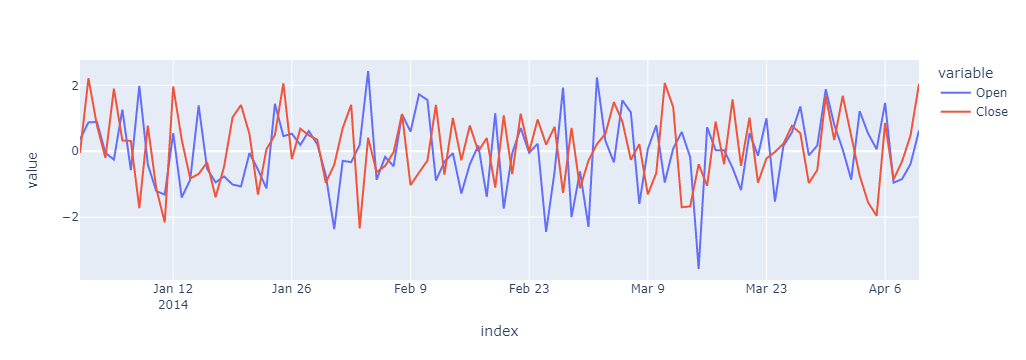

In [5]:
fig = px.line(df, x=df.index, y=['Open', 'Close'])
fig